# Reinforcement Learning for Robotic Task Recognition in Event-Driven Environments

This project will implement a **Reinforcement Learning (RL)** algorithm to enable a **robotic arm** to interact with the right box based on observable events. The objective is to develop an RL-based system in which a robot can recognize and respond to **complex, sequential decision-making scenarios** within a dynamic, event-driven environment. Specifically, the robot will control a robotic arm that reacts to these changing situations.

To achieve this, we will use **simulations like PyBullet** for robotic tasks and the **Open the Chests (OtC) environment** to tackle complex sequential decision-making challenges. The Open the Chests environment provides a **sequential event-based world** where the robot can observe and make informed decisions. Meanwhile, PyBullet will be used to **simulate the control of a robotic arm**, enabling it to physically respond to situations and manipulate objects.

The goal is to develop a system where the robot can autonomously **identify event patterns, make decisions, and take actions** to interact with its environment effectively.


## Relevant Documentation and Libraries

To better understand and implement the project, the following resources and libraries are recommended:

### Reinforcement Learning Libraries:
- **Stable Baselines3**: RL framework with pre-implemented algorithms. [📖 Documentation](https://stable-baselines3.readthedocs.io/en/master/)
- **Gymnasium (formerly OpenAI Gym)**: Toolkit for developing RL environments. [📖 Documentation](https://gymnasium.farama.org/)
- **RL Baselines3 Zoo**: Collection of pre-trained RL agents. [📖 GitHub](https://github.com/DLR-RM/rl-baselines3-zoo)

### Robotic Simulation:
- **PyBullet**: Physics engine for robotic simulations. [📖 Documentation](https://pybullet.org/) [📖 Quicktart Guide](https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit?tab=t.0)
- **KUKA Arm (KukaBulletEnv-v0)**: PyBullet environment for KUKA robot arm control. [📖 Example](https://github.com/bulletphysics/bullet3/tree/master/examples/pybullet/gym/pybullet_envs) [📖 Example](https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/__init__.py)
- **Reacher**: Simulated environment for reaching tasks. [📖 Documentation](https://www.gymlibrary.dev/environments/mujoco/reacher/)

### Open the Chests (OtC) Environment:
- **OtC Environment Overview**: Sequential event-based RL scenario. [📖  GitHub ](https://github.com/ThalesGroup/open-the-chests) [📖 Article ](https://drops.dagstuhl.de/entities/document/10.4230/LIPIcs.TIME.2024.5) [📖 Presentation ](https://www.lirmm.fr/time2024/files/OpenTheChestsTIME2024.pdf)



## 1. RL Environment with PyBullet

### **Goal**
The objective of this section is to **set up a RL environment** using **PyBullet**, where a robotic arm learns to **reach for a specific chest** based on input commands. The robot must **autonomously decide and execute movements** to successfully complete the task.

### **Steps**:
1. **Multi-goal KUKA environment**  
   - The robot will be trained to interact with multiple chests or boxes.  
   - It will **make decisions based on environmental observations and task-related commands**.
  
2. **Training the RL model**  
   - The robotic arm will learn to **reach and interact with the chosen chest**.  
   - A **reinforcement learning algorithm** will be implemented to optimize its movements.

### **Suggested Approach**

Set up a **robotic environment** using **PyBullet** and implement either the **KUKA (KukaBulletEnv-v0)** or **Reacher (ReacherBulletEnv-v0)** robot arm models to simulate its ability to interact with the environment. The robot must learn to **respond to commands** to reach for different objects. Upon receiving a command to reach for a **specific object**, the RL agent must adjust the robot’s movements to successfully complete the task according to the given instruction.

Multiple objects should be **manually added** to the simulation environment, and appropriate **reward and success functions** must be defined for the agent’s interactions. The agent should be **trained** to learn how to reach for the objects based on the given commands.

To implement this, you must:
- **Use PyBullet** to create a **physics simulation** of the robot arm along with multiple objects.
- **Define an RL agent** that learns from rewards and successfully completes the reaching task.
- **Train the agent** and **evaluate its performance** to optimize learning.

### **References**
- **Gymnasium (formerly OpenAI Gym) Documentation**  
  - [Environment Creation Tutorial](https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/)  
  - [Gym Library Environment Creation](https://www.gymlibrary.dev/content/environment_creation/)  

- **Custom PyBullet Robot Arm Projects**  
  - [PyBullet Tutorial](https://www.etedal.net/2020/04/pybullet-panda_2.html)  
  - [Multi-Goal PyBullet Gym](https://github.com/IanYangChina/pybullet_multigoal_gym/tree/master)  

pybullet build time: Jan 29 2025 23:20:52
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (480, 360) to (480, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Timestep 749...

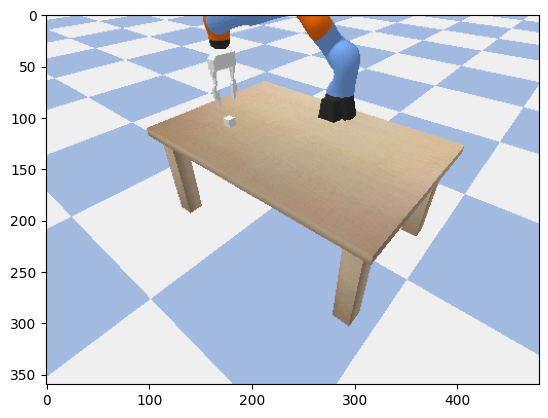

In [1]:
# --------------------------------------------------------
# Example Code: Using PyBullet for Robotic Arm Simulation
# --------------------------------------------------------
# This example demonstrates how to:
# - Set up a PyBullet environment
# - Load a robotic arm (KUKA iiwa) with a gripper
# - Load objects (table, cube) for interaction
# - Attach the gripper to the robotic arm
# - Control the robotic arm using inverse kinematics
# - Move the robotic arm to pick and place an object
# - Capture frames from the simulation and save as a video
#
# This code provides an **overview** of how PyBullet can be used for robotic simulations.
# For a **deeper understanding**, please refer to the **tutorials and resources** provided
# in the documentation section of this project.
# --------------------------------------------------------

# Import necessary libraries for physics simulation, image processing, and visualization
import os
import time
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import cv2
import imageio_ffmpeg
from base64 import b64encode
from IPython.display import HTML

# --------------------------------------------------------
# SETUP: Initialize PyBullet simulation
# --------------------------------------------------------

# Use p.GUI for a graphical interface or p.DIRECT for headless mode (no GUI)
p.connect(p.DIRECT)

# Add PyBullet's built-in data directory for loading objects
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Set gravity in the environment (0, 0, -10) simulates Earth's gravity (negative z direction)
p.setGravity(0, 0, -10)


# --------------------------------------------------------
# LOAD OBJECTS INTO SIMULATION
# --------------------------------------------------------

# Load a static ground plane
plane_id = p.loadURDF("plane.urdf")

# Load a KUKA robotic arm at a specific position
kuka_id = p.loadURDF("kuka_iiwa/model_vr_limits.urdf",
                      1.4, -0.2, 0.6,  # Base position (x, y, z)
                      0, 0, 0, 1)      # Base orientation (quaternion)

# Load a gripper and attach it to the robotic arm
kuka_gripper_id = p.loadSDF("gripper/wsg50_one_motor_gripper_new_free_base.sdf")[0]

# Load a table in the environment
table_id = p.loadURDF("table/table.urdf",
                      basePosition=[1.0, -0.2, 0.0],
                      baseOrientation=[0, 0, 0.7071, 0.7071])

# Load a cube (object to interact with) at a specific position
cube_id = p.loadURDF("cube.urdf", basePosition=[0.85, -0.2, 0.65], globalScaling=0.05)

# --------------------------------------------------------
# ATTACH GRIPPER TO ROBOTIC ARM
# --------------------------------------------------------

# Create a fixed constraint between the arm and the gripper
kuka_cid = p.createConstraint(kuka_id, 6, kuka_gripper_id, 0,
                              p.JOINT_FIXED, [0, 0, 0], [0, 0, 0.05], [0, 0, 0])

# Add a gear constraint to control the gripper fingers
kuka_cid2 = p.createConstraint(kuka_gripper_id, 4, kuka_gripper_id, 6,
                               jointType=p.JOINT_GEAR, jointAxis=[1,1,1],
                               parentFramePosition=[0,0,0], childFramePosition=[0,0,0])

# Adjust constraint properties to control the gripper
p.changeConstraint(kuka_cid2, gearRatio=-1, erp=0.5, relativePositionTarget=0, maxForce=100)

# --------------------------------------------------------
# RESET ROBOTIC ARM TO INITIAL POSITION
# --------------------------------------------------------

# Define initial joint positions for the robotic arm
jointPositions = [-0.0, -0.0, 0.0, 1.570793, 0.0, -1.036725, 0.000001]

# Reset each joint to the predefined position
for jointIndex in range(p.getNumJoints(kuka_id)):
    p.resetJointState(kuka_id, jointIndex, jointPositions[jointIndex])
    p.setJointMotorControl2(kuka_id, jointIndex, p.POSITION_CONTROL,
                            jointPositions[jointIndex], 0)

# Reset the gripper's position
p.resetBasePositionAndOrientation(kuka_gripper_id, [0.923103, -0.200000, 1.250036],
                                  [-0.000000, 0.964531, -0.000002, -0.263970])

# Define gripper joint positions and reset them
jointPositions = [0.000000, -0.011130, -0.206421, 0.205143, -0.009999, 0.000000, -0.010055, 0.000000]
for jointIndex in range(p.getNumJoints(kuka_gripper_id)):
    p.resetJointState(kuka_gripper_id, jointIndex, jointPositions[jointIndex])
    p.setJointMotorControl2(kuka_gripper_id, jointIndex, p.POSITION_CONTROL,
                            jointPositions[jointIndex], 0)

# Define key parameters
num_joints = p.getNumJoints(kuka_id)  # Number of joints in the KUKA arm
kuka_end_effector_idx = 6  # Define the end-effector index

# --------------------------------------------------------
# CAMERA SETUP FOR VIDEO RECORDING
# --------------------------------------------------------

# Define camera parameters
cam_target_pos = [.95, -0.2, 0.2]  # Camera focus point
cam_distance = 2.05  # Distance from the scene
cam_yaw, cam_pitch, cam_roll = -50, -40, 0  # Camera angles
cam_width, cam_height = 480, 360  # Image resolution

# Initialize video writer
vid = imageio_ffmpeg.write_frames('vid.mp4', (cam_width, cam_height), fps=30)
vid.send(None)  # Start video recording

# --------------------------------------------------------
# SIMULATION LOOP (MOVE ROBOT ARM)
# --------------------------------------------------------

for t in range(750):
    print(f'\rTimestep {t}...', end='')

    # Capture and record frames every 8 steps (to maintain 30 FPS video)
    if t % 8 == 0:
        cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, 2)
        cam_projection_matrix = p.computeProjectionMatrixFOV(60, cam_width*1./cam_height, 0.01, 100)
        image = p.getCameraImage(cam_width, cam_height, cam_view_matrix, cam_projection_matrix)[2][:, :, :3]
        vid.send(np.ascontiguousarray(image))  # Save frame to video

    # Define movement phases for the robotic arm and gripper
    target_pos, gripper_val = [0.85, -0.2, 0.97], 0
    if 150 <= t < 250:
        target_pos, gripper_val = [0.85, -0.2, 0.97], 1  # Grab object
    elif 250 <= t < 400:
        target_pos, gripper_val = [0.85, -0.2, 0.97 + 0.13*(t-250)/150.], 1  # Lift object
    elif 400 <= t < 600:
        target_pos, gripper_val = [0.85, -0.2 + 0.4*(t-400)/200., 1.1], 1  # Move object sideways
    elif 600 <= t < 700:
        target_pos, gripper_val = [0.85, 0.2, 1.1], 1  # Hold object
    elif t >= 700:
        target_pos, gripper_val = [0.85, 0.2, 1.1], 0  # Release object

    # Compute inverse kinematics to move the robotic arm
    target_orn = p.getQuaternionFromEuler([0, 1.01*math.pi, 0])
    joint_poses = p.calculateInverseKinematics(kuka_id, kuka_end_effector_idx, target_pos, target_orn)
    for j in range(num_joints):
        p.setJointMotorControl2(bodyIndex=kuka_id, jointIndex=j, controlMode=p.POSITION_CONTROL, targetPosition=joint_poses[j])

    # Control gripper opening/closing
    p.setJointMotorControl2(kuka_gripper_id, 4, p.POSITION_CONTROL, targetPosition=gripper_val*0.05, force=100)
    p.setJointMotorControl2(kuka_gripper_id, 6, p.POSITION_CONTROL, targetPosition=gripper_val*0.05, force=100)

    # Step simulation forward
    p.stepSimulation()

# Display the last frame as an image
plt.imshow(Image.fromarray(image))

# Close video recording and disconnect from PyBullet
vid.close()
p.disconnect()



In [2]:
# Play recorded video

#os.system(f"ffmpeg -y -i vid.avi -vcodec libx264 vidc.mp4") # convert to mp4 to show in browser
mp4 = open('vid.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=480 controls><source src="%s" type="video/mp4"></video>' % data_url)

## 2. "Open the Chests" Environment

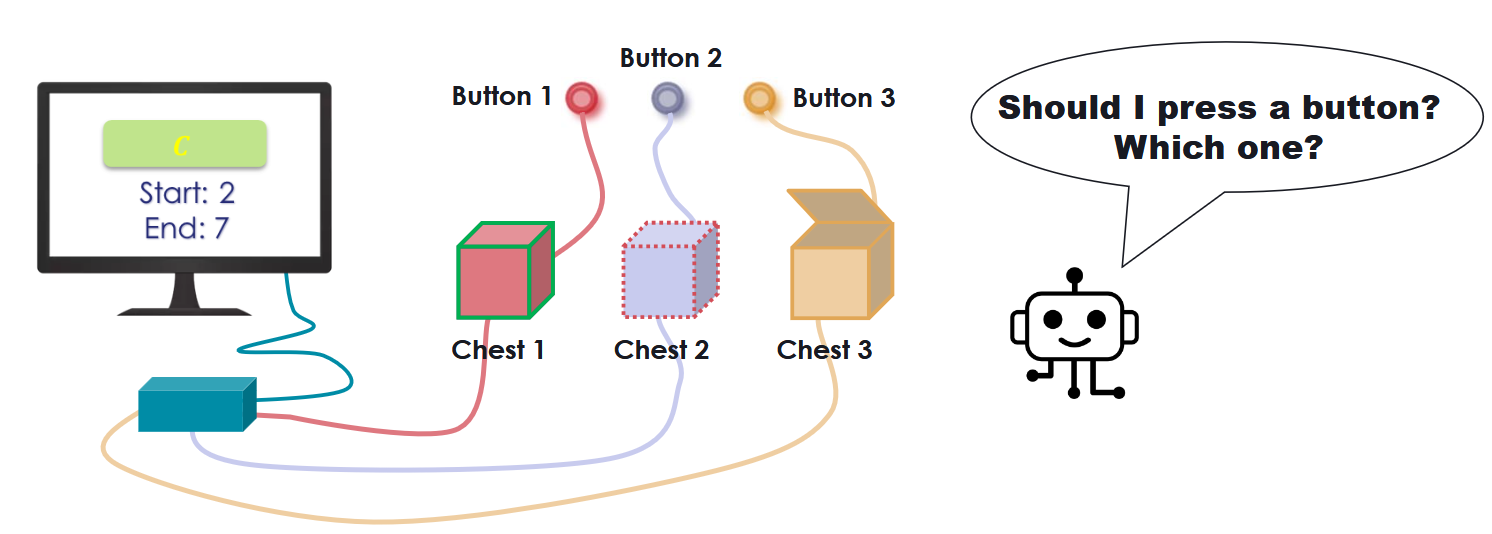

The **Open the Chests** environment introduces **event-driven decision-making**, where the robot must **recognize patterns in an event stream** and take the appropriate action. The environment simulates a scenario where **various activities generate a stream of events**, each representing a **significant observation**.

The robot's goal is to:
- **Recognize event signatures** in the stream.
- **Associate events with specific activities**.
- **Use this information to open the correct chest** by taking the appropriate action (e.g., pressing a button).

This requires the robot to **learn how to interpret event sequences** and **respond accordingly**.


### **Challenge**
The key difficulty in this environment is handling **asynchronous and sequential events**. The robot must:
- **Interpret real-time event streams** where new information continuously arrives.
- **Recognize patterns** in events occurring at different points in time.
- **Distinguish relevant events** from noise in the event stream.
- **Identify and execute the correct action** based on learned patterns.

As event sequences become more **complex and interdependent**, the learning problem shifts from a simple **one-to-one mapping** to a **time-dependent decision-making** challenge.

### **Suggested Approach**
The **solution** to this problem can be approached at **multiple levels of complexity**:

#### **1. Simple Approach: Single Event Mapping**
- **Use a basic RL agent** that **associates the last seen event with a specific action**.
- The agent learns to **map a single event to an action** (e.g., pressing a button to open a chest).
- **Limitations:**  
  - Cannot handle **complex sequences** where multiple events must be considered.  
  - **Fails** if event history is required to make decisions.

#### **2. Intermediate Approach: Temporal Windows**
- Implement a **time window** where the agent **stores and analyzes recent events**.
- The agent can **recognize simple event sequences** by considering a **short history**.
- **Improvement over single-event mapping**, but still struggles with **long-range dependencies**.

#### **3. Advanced Approach: Transformers or Reccurence for Temporal Dependencies**
- **Utilize deep learning techniques** such as:
  - **Recurrent Neural Networks (RNNs)**
  - **Long Short-Term Memory (LSTMs)**
  - **Transformers (e.g., GPT or BERT-like models)**
- These models allow the agent to:
  - **Process complex event sequences** spanning many steps.
  - **Learn temporal relationships** and **predict upcoming events**.
  - **Generalize across different event patterns** instead of memorizing specific cases.




In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import gym
from openthechests.src.OpenTheChestsGym import OpenTheChestsGym

from register_envs import all_types, all_attributes, register_custom_envs


Step 1: Action=0, Reward=0, Done=False
Step 2: Action=0, Reward=0, Done=False
Step 3: Action=0, Reward=-1, Done=False
Step 4: Action=0, Reward=0, Done=False
Step 5: Action=0, Reward=0, Done=False
Step 6: Action=0, Reward=-1, Done=False
Step 7: Action=0, Reward=0, Done=False
Step 8: Action=0, Reward=0, Done=False
Step 9: Action=0, Reward=-1, Done=False
Step 10: Action=0, Reward=0, Done=False


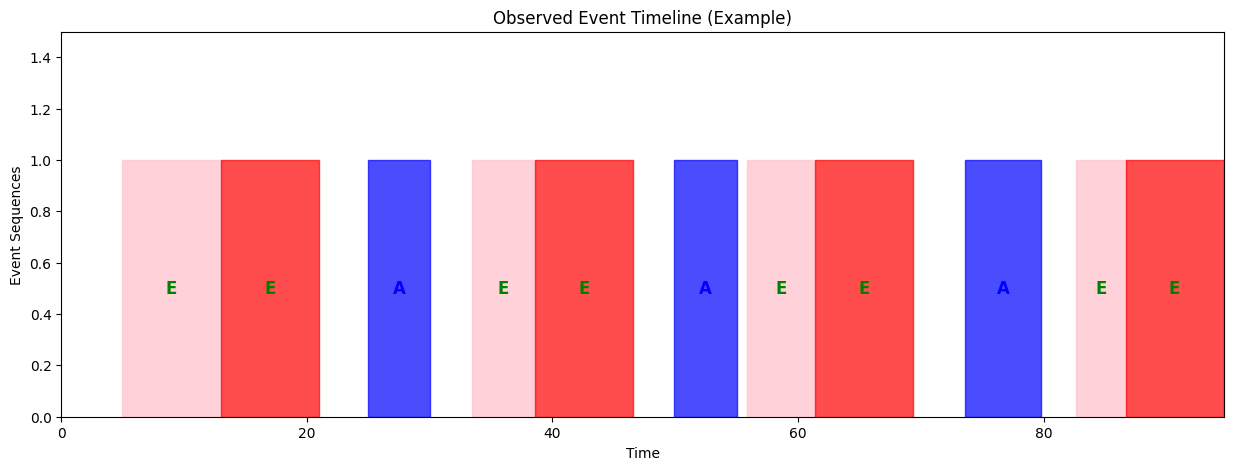

In [4]:
# ------------------------------------------------------------------------------
# OpenTheChestsGym Environment Interaction & Event Visualization
# ------------------------------------------------------------------------------
# This script demonstrates:
# - How to initialize and interact with the OpenTheChestsGym environment.
# - How to extract event data from the environment.
# - How to visualize observed events in a timeline.
#
# The script follows these steps:
# 1. Define event types, attributes, and instructions.
# 2. Initialize the environment with the given configuration.
# 3. Run a loop to collect events while interacting with the environment.
# 4. Visualize the collected events using a timeline plot.
# ------------------------------------------------------------------------------

# --------------------------------------------------------
# INITIALIZE THE ENVIRONMENT
# --------------------------------------------------------

# Define the list of event types and their attributes
all_event_types = ['A', 'B', 'C', 'D', 'E']
all_event_attributes = {
    'fg': ['red', 'blue', 'green', 'orange', 'pink'],
    'bg': ['red', 'blue', 'green', 'orange', 'pink']
}

# Define noise event types and attributes
all_noise_types = ['G', 'H', 'F']
all_noise_attributes = {
    'fg': ['yellow', 'purple', 'black'],
    'bg': ['yellow', 'purple', 'black']
}

# Define event instructions (simulating sequences of actions and dependencies)
instructions = [
    [
        {'command': 'delay', 'parameters': 10},
        {'command': 'instantiate', 'parameters': ('A', {'bg': 'blue', 'fg': 'blue'}, {'mu': 5, 'sigma': 2}), 'variable_name': 'distinct'},
        {'command': 'instantiate', 'parameters': ('E', {'bg': 'pink', 'fg': 'green'}, {'mu': 6, 'sigma': 2}), 'variable_name': 'e1'},
        {'command': 'instantiate', 'parameters': ('E', {'bg': 'red', 'fg': 'green'}, {'mu': 8, 'sigma': 0}), 'variable_name': 'e2'},
        {'command': 'met_by', 'parameters': ['e2', 'e1'], 'variable_name': 'e2', 'other': {}},
        {'command': 'after', 'parameters': ['distinct', 'e2'], 'variable_name': 'distinct', 'other': {'gap_dist': {'mu': 4, 'sigma': 1}}}
    ]
]

# Initialize the OpenTheChestsGym environment
env = OpenTheChestsGym(instructions=instructions,
                       all_event_types=all_event_types,
                       all_event_attributes=all_event_attributes,
                       all_noise_types=all_noise_types,
                       all_noise_attributes=all_noise_attributes,
                       verbose=False,
                       discrete=True, # If True actions are discrete, meaning that an action corresponds to the number of the box to open.
                                       # If False actions are binary vectors, meaning that a 0 at index i corresponds to pushing the buton i.
                       stb3=False)

# --------------------------------------------------------
# COLLECT EVENT OBSERVATIONS
# --------------------------------------------------------

def event_from_obs(obs):
    """
    Extracts event information from the environment observation.
    Converts indices into human-readable symbols and colors.
    """
    event = obs["context"]
    return {
        "symbol": all_event_types[event.type],  # Convert event index to actual event type
        "bg_color": all_event_attributes["bg"][event.attributes["bg"]],  # Convert bg index to color
        "symbol_color": all_event_attributes["fg"][event.attributes["fg"]],  # Convert fg index to color
        "start_time": event.start,
        "end_time": event.end
    }

# Store observed events
observed_events = []

# Reset environment and initialize observation
obs = env.reset()
observed_events.append(event_from_obs(obs))

# Run simulation loop to collect events
for step in range(10):
    action = 0  # Fixed action (Can be randomized using env.action_space.sample())
    obs, reward, done, info = env.step(action)  # Take a step in the environment

    # Extract event from `obs["context"]`
    if "context" in obs and obs["context"] is not None:
        observed_events.append(event_from_obs(obs))

    print(f"Step {step+1}: Action={action}, Reward={reward}, Done={done}")

    if done:
        print("Environment reached a terminal state. Resetting...")
        obs = env.reset()

# --------------------------------------------------------
# VISUALIZE EVENT SEQUENCES
# --------------------------------------------------------

def draw_event_sequence_matplot(events, start_time=0, end_time=50, env_name = "Example"):
    """
    Visualizes the observed event sequence as a timeline, showing event occurrences over time.
    """
    # Create the figure and axis with a larger width
    fig, ax = plt.subplots(figsize=(15, 5))  # Increased width from 10 to 15

    last_event_end_times = []  # Track end times to avoid overlapping
    height = 1  # Height of each event bar

    for event in events:
        event_name = event["symbol"]
        start = event["start_time"]
        end = event["end_time"]
        color = event["bg_color"]
        text_color = event["symbol_color"]

        # Find the correct row for the event (avoid overlapping)
        line = 0
        while line < len(last_event_end_times):
            if start >= last_event_end_times[line]:  # If space is available in this line
                break
            line += 1
        if line == len(last_event_end_times):
            last_event_end_times.append(end)
        else:
            last_event_end_times[line] = end

        # Draw the event as a rectangle
        y_pos = line * (height + 0.5)
        rect = patches.Rectangle((start, y_pos), max(end - start, 0.1), height, color=color, alpha=0.7)  # Ensure non-zero width
        ax.add_patch(rect)

        # Label the event in the center of the rectangle
        ax.text(start + (end - start) / 2, y_pos + height / 2, event_name,
                horizontalalignment='center', verticalalignment='center',
                color=text_color, fontsize=12, fontweight='bold')

    # Set limits and labels
    ax.set_xlim(start_time, end_time)
    ax.set_ylim(0, len(last_event_end_times) * (height + 0.5))
    ax.set_xlabel("Time")
    ax.set_ylabel("Event Sequences")
    ax.set_title("Observed Event Timeline " + f'({env_name})')
    plt.show()


# Call the function to plot the observed event sequence
draw_event_sequence_matplot(observed_events, start_time=0, end_time=observed_events[-1]["end_time"])

# Close the environment
env.close()

### **Configurations**
The complexity of the problem can be adjusted based on how events are structured and how much information the robot must process. Below are the **four defined environments** with increasing levels of difficulty.

#### **1. Easy: 3 Chests, 1 Event Per Chest** (`OpenTheChests-v0`)
- Each **chest is associated with a single event**.
- The robot **only needs to react to a single event** to identify the correct chest.
- **No historical context or sequence tracking** is required.
- **Challenge Level: Minimal** – A simple one-to-one mapping between an event and an action.
- Example:
  - **Event A** → Open **Chest 1**  
  - **Event B** → Open **Chest 2**  
  - **Event C** → Open **Chest 3**  


#### **2. Medium: 3 Chests, 4 Events Per Chest** (`OpenTheChests-v1`)
- Each chest is associated with **a sequence of 4 events**.
- The robot **must recognize short event sequences** to determine the correct chest.
- **Some memory and sequence tracking** are required.
- **Challenge Level: Moderate** – The robot must understand simple temporal dependencies.
- Example:
  - **Event A → Event B → Event C → Event D** → Open **Chest 1**  
  - **Event X → Event Y → Event Z → Event W** → Open **Chest 2**  
  - **Event M → Event N → Event O → Event P** → Open **Chest 3**  


#### **3. Hard: 3 Chests, 16 Events Per Chest** (`OpenTheChests-v2`)
- Each chest is associated with a **complex sequence of 16 events**.
- The robot **must track long-term dependencies** between events.
- **Deep memory and advanced pattern recognition** are necessary.
- **Challenge Level: High** – The robot must handle **complex sequential dependencies** and **avoid distractions**.
- Example:
  - **Event red A → after blue B → during C → after D → ... → Event P** → Open **Chest 1**  
  - **Event X → during red Y → after pink Z → during W → ... → Event O** → Open **Chest 2**  
  - **Event M → met_by N → during O → after P → ... → Event R** → Open **Chest 3**  

### **Testing Different Complexity Levels**
These three configurations allow testing the **robot’s ability to recognize patterns** in **low, medium, and high complexity cases**.

- **In the Easy environment**, the agent can use **basic reinforcement learning** to associate a **single event** with the correct action.
- **In the Medium environment**, the agent can use **simple memory storage** to correctly identify **event patterns**.
- **In the Hard environment**, the agent requires **advanced memory mechanisms (LSTMs, Transformers, or Attention-based models)** to detect **long event sequences**.

This setup allows for a **progressive increase in difficulty**, helping to evaluate **how different agents perform at various levels of complexity**.

In [5]:

def event_from_obs_gym(obs, types, attributes):
    """
    Extracts event information from the environment observation.
    Converts indices into human-readable symbols and colors.
    """
    return {
        "symbol": types[obs["e_type"]],  # Convert event index to actual event type
        "bg_color": attributes["bg"][obs["bg"]],  # Convert bg index to color
        "symbol_color": attributes["fg"][obs["fg"]],  # Convert fg index to color
        "start_time": obs["start"][0],
        "end_time": obs["end"][0]
    }

register_custom_envs()

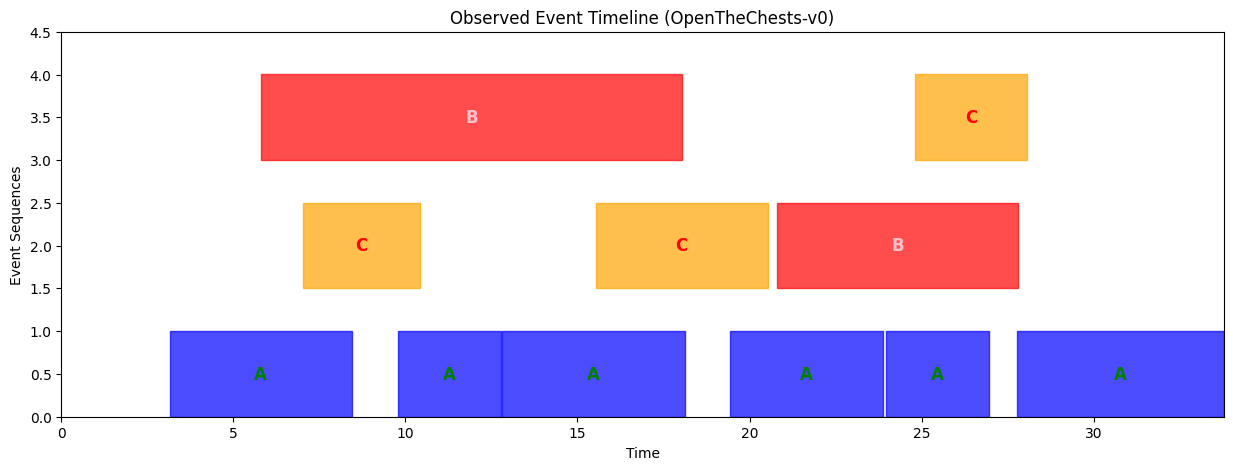

In [6]:
# --------------------------------------------------------
# COLLECT OBSERVATIONS FROM BOTH ENVIRONMENTS
# --------------------------------------------------------

def collect_observations(env_name, num_steps=30):
    """
    Collects event observations from a given OpenTheChests environment.

    Args:
        env_name (str): The registered environment name ("OpenTheChests-v0" or "OpenTheChests-v1").
        num_steps (int): Number of observations to collect.

    Returns:
        list: Collected event observations.
    """

    # Create the environment
    env = gym.make(env_name)

    # Store observed events
    observed_events = []

    # Reset environment and initialize observation
    obs = env.reset()
    observed_events.append(event_from_obs_gym(obs, all_types, all_attributes))

    # Run simulation loop to collect events
    for step in range(num_steps):
        action = [0] * env.action_space.n  # Fixed action (Can be randomized using env.action_space.sample())
        obs, reward, done, info = env.step(action)  # Take a step in the environment

        # Extract event information
        observed_events.append(event_from_obs_gym(obs, all_types, all_attributes))

        # print(f"Step {step+1} ({env_name}): Action={action}, Reward={reward}, Done={done}")

        if done:
            print(f"{env_name} reached a terminal state. Resetting...")
            obs = env.reset()

    # Close the environment
    env.close()

    return observed_events

# Collect data from both environments
observed_events_easy = collect_observations("OpenTheChests-v0", num_steps=10)
observed_events_medium = collect_observations("OpenTheChests-v1", num_steps=50)
observed_events_hard = collect_observations("OpenTheChests-v2", num_steps=100)

# --------------------------------------------------------
# VISUALIZE EVENT SEQUENCES
# --------------------------------------------------------

# Visualize collected observations sequentially
draw_event_sequence_matplot(observed_events_easy, start_time=0, end_time=observed_events_easy[-1]["end_time"], env_name="OpenTheChests-v0")
#draw_event_sequence_matplot(observed_events_hard, start_time=0, end_time=observed_events_hard[-1]["end_time"], env_name="OpenTheChests-v2")


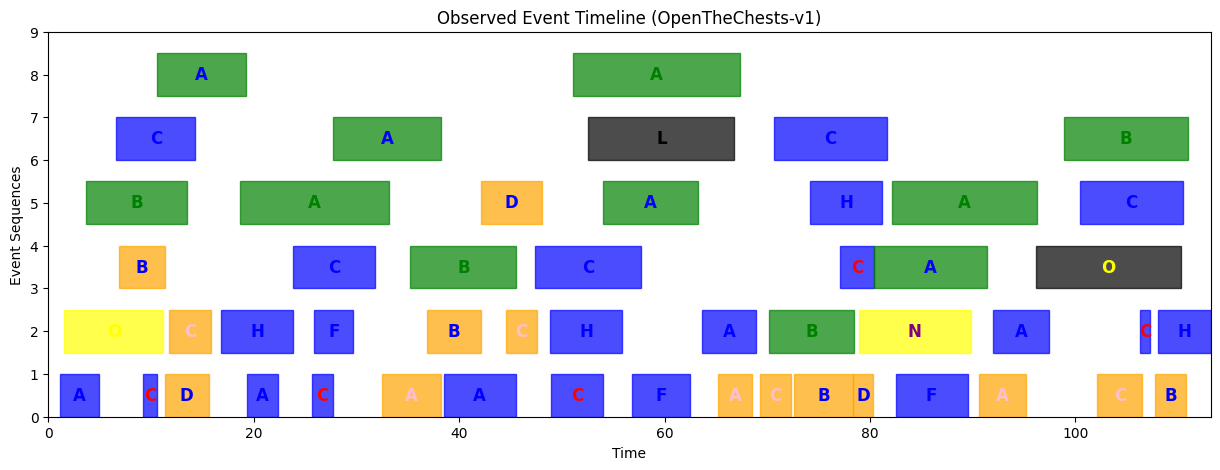

In [7]:
draw_event_sequence_matplot(observed_events_medium, start_time=0, end_time=observed_events_medium[-1]["end_time"], env_name="OpenTheChests-v1")


In [11]:
import warnings
warnings.filterwarnings("ignore")
from torch import multiprocessing


from collections import defaultdict

import matplotlib.pyplot as plt
import torch

import random
from torch import nn
from torch.optim import Adam
from collections import deque
from torch.nn import RNN

# import torch.nn.functional as F
# from tensordict.nn import TensorDictModule
# from tensordict.nn.distributions import NormalParamExtractor

# from torchrl.collectors import SyncDataCollector
# from torchrl.data.replay_buffers import ReplayBuffer
# from torchrl.data.replay_buffers.samplers import SamplerWithoutReplacement
# from torchrl.data.replay_buffers.storages import LazyTensorStorage
# from torchrl.envs import (Compose, DoubleToFloat, ObservationNorm, StepCounter,
#                           TransformedEnv)
# from torchrl.envs.libs.gym import GymEnv
# from torchrl.envs.utils import check_env_specs, ExplorationType, set_exploration_type
# from torchrl.modules import ProbabilisticActor, TanhNormal, ValueOperator
# from torchrl.objectives import ClipPPOLoss
# from torchrl.objectives.value import GAE
# from tqdm import tqdm

env_name = "OpenTheChests-v0"
# env_name = "OpenTheChests-v1"
# env_name = "OpenTheChests-v2"

env = gym.make(env_name)

episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        action = env.action_space.sample()
        obs, reward, state, info = env.step(action)
        score += reward
        done = True


In [12]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# EPS_START is the starting value of epsilon
# EPS_END is the final value of epsilon
# EPS_DECAY controls the rate of exponential decay of epsilon, higher means a slower decay
# TAU is the update rate of the target network
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 128
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

In [60]:
def convert_index_to_action(index):
    """
    Convertit un index en action.
    Exemple: 4 -> [1, 0, 0]
    """
    return np.array([int(digit) for digit in bin(index).removeprefix("0b").zfill(3)])

def simple_encoder(state):
    dict_state = {'A': 1, 'B': 2, 'C': 3}
    encoded_state = np.zeros(4)
    idx = dict_state.get(state['symbol'], 0)
    encoded_state[idx] = 1
    return np.array(encoded_state)

def action_encoder(action_or_index):
    """
    Encode un vecteur binaire de taille 3 (interprété comme bits [a2, a1, a0]) 
    ou un indice en vecteur one-hot de taille 8.
    """
    if isinstance(action_or_index, (np.ndarray, list)):
        action_vec = np.array(action_or_index, dtype=int)
        assert action_vec.shape == (3,), "Le vecteur d'action doit avoir 3 éléments"
        # Convention : bit2, bit1, bit0 → poids fort à gauche
        index = int(action_vec[0] * 4 + action_vec[1] * 2 + action_vec[2] * 1)
    elif isinstance(action_or_index, int):
        index = action_or_index
        assert 0 <= index < 8, "Index d'action hors limite"
    else:
        raise TypeError("action_or_index doit être un vecteur binaire ou un entier")

    encoded_action = np.zeros(8)
    encoded_action[index] = 1
    return encoded_action
    
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = map(np.stack, zip(*batch))
        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)

def train(q_net, target_q_net, buffer, optimizer, batch_size=32, gamma=0.99, device='cpu'):
    
    q_net.train()
    target_q_net.eval()
    
    # Tant que le buffer n’a pas assez de transitions, on ne fait pas d'entraînement
    if len(buffer) < batch_size:
        return

    state, action, reward, next_state, done = buffer.sample(batch_size)

    state = torch.tensor(state, dtype=torch.float32).to(device)
    action = torch.tensor(action, dtype=torch.int64).to(device)
    reward = torch.tensor(reward, dtype=torch.float32).unsqueeze(1).to(device)
    next_state = torch.tensor(next_state, dtype=torch.float32).to(device)
    done = torch.tensor(done, dtype=torch.float32).unsqueeze(1).to(device)

    # Q(s,a)
    q_values = q_net(state)
    q_value = (q_values * action).sum(dim=1, keepdim=True)
    
    # max_a' Q'(s',a')
    with torch.no_grad():
        next_q_values = target_q_net(next_state)
        max_next_q = next_q_values.max(dim=1, keepdim=True)[0]
        target = reward + gamma * max_next_q * (1 - done)

    loss = nn.MSELoss()(q_value, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()
    
def evaluate_agent(test_env, q_net, episodes=10, verbose=False, device='cpu'):
    q_net.eval()
    
    total_rewards = []
    
    for ep in range(episodes):
        obs = test_env.reset()
        state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))
        done = False
        ep_reward = 0
        ep_steps = 0

        while not done:
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                q_values = q_net(state_tensor)
                action = convert_index_to_action(q_values.argmax(dim=1).item())
            letter = event_from_obs_gym(obs, all_types, all_attributes)['symbol']
            obs, reward, done, _ = test_env.step(action)
            if verbose:
                print(f"[Ep {ep} | Step {ep_steps}] State: {letter}, Action: {action}, Reward: {reward}, Done: {done}")
            state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))
            ep_reward += reward
            ep_steps += 1

        total_rewards.append(ep_reward / ep_steps if ep_steps != 0 else 0)

    return np.mean(total_rewards)


def select_action(q_net, state, eps=0.1, decay=True, device='cpu'):
    global steps_done
    sample = np.random.rand()
    if decay:
        eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    else:
        eps_threshold = eps
    if sample < eps_threshold:
        action = env.action_space.sample()
    else:
        with torch.no_grad():
            state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            q_values = q_net(state_tensor)
            action = convert_index_to_action(q_values.argmax(dim=1).item())
    steps_done += 1
    return action

In [54]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_size, 64),
            # nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.Linear(64, action_size),
            # nn.Dropout(p=0.1)
        )

    def forward(self, x):
        return self.fc(x)

### DQN

In [66]:
state_size = 4
action_size = 8
gammas = [0.99, 0.9, 0.5, 0.1]
# gammas = [0.99, 0.9]
# gammas = [0.9]
loss_f_gamma = []
rewards_f_gamma = []
epocs = 500
steps_done = 0


for gamma in gammas:
    # q_net = QNetwork(state_size, action_size).to(device)
    # target_q_net = QNetwork(state_size, action_size).to(device)
    # target_q_net.load_state_dict(q_net.state_dict())
    q_net = RNNQNetwork(state_size, action_size).to(device)
    target_q_net = RNNQNetwork(state_size, action_size).to(device)
    target_q_net.load_state_dict(q_net.state_dict())

    optimizer = Adam(q_net.parameters(), lr=0.01)
    buffer = ReplayBuffer(1000)

    # Reset environment and initialize observation
    obs = env.reset()
    state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))
    training_loss = []
    average_rewards = []
    done = False

    for episode in range(epocs):
        if done:
            obs = env.reset()
            state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))
            done = False
        action = select_action(q_net, state, eps=0.1, device=device)
        obs, reward, done, info = env.step(action)
        steps_done += 1
        next_state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))

        buffer.push(state, action_encoder(action), reward, next_state, done)
        state = next_state
        loss = train(q_net, target_q_net, buffer, optimizer, batch_size=BATCH_SIZE, gamma=gamma, device=device)
        if loss is not None:
            training_loss.append(loss)
        # update target network occasionnellement
        if episode % 50 == 0:
            target_q_net.load_state_dict(q_net.state_dict())
            test_env = gym.make(env_name)
            average_reward = evaluate_agent(test_env, q_net, episodes=200, device=device)
        average_rewards.append(average_reward)
    loss_f_gamma.append(training_loss)
    rewards_f_gamma.append(average_rewards)
    


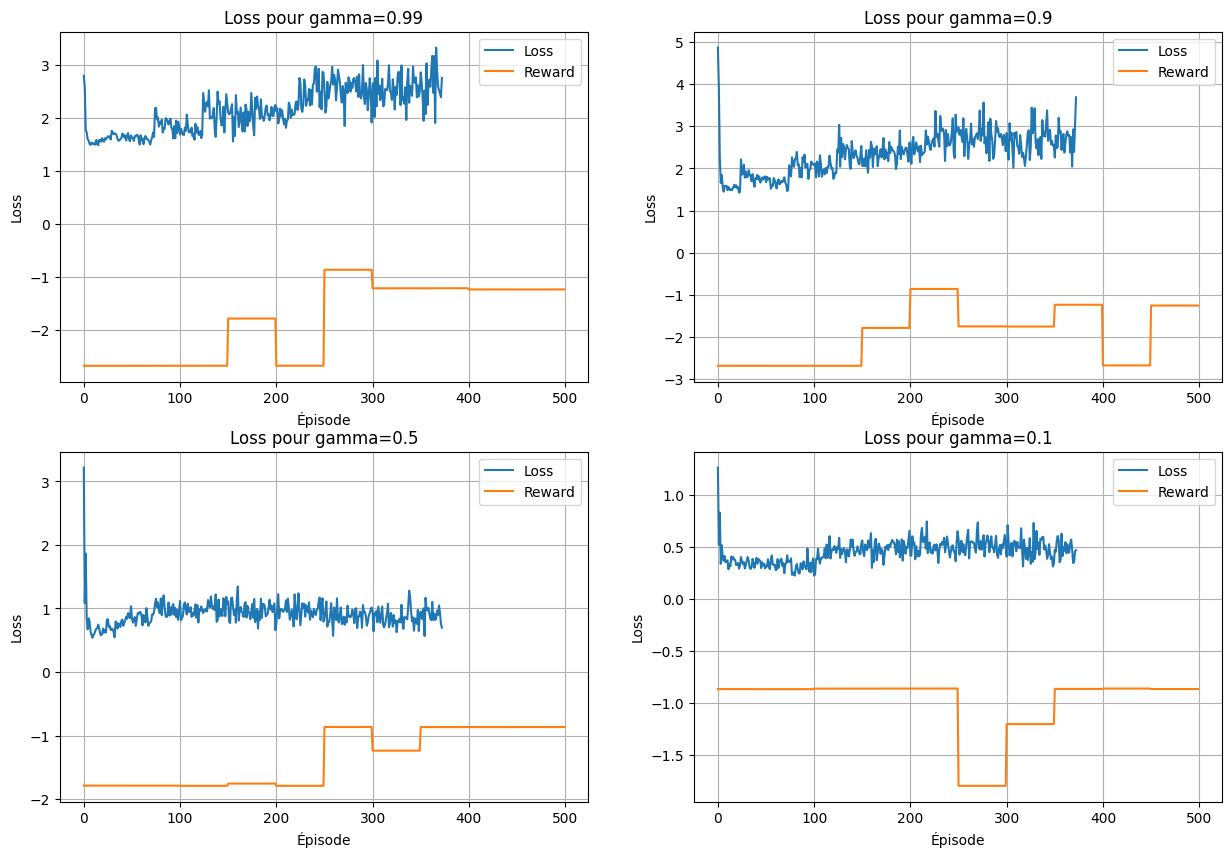

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(len(gammas)):
    axs[i//2, i%2].plot(loss_f_gamma[i], label="Loss")
    axs[i//2, i%2].plot(rewards_f_gamma[i], label="Reward")
    axs[i//2, i%2].set_title(f"Loss pour gamma={0.99 if i==0 else 0.9 if i==1 else 0.5 if i==2 else 0.1}")
    axs[i//2, i%2].set_xlabel("Épisode")
    axs[i//2, i%2].set_ylabel("Loss")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid()
fig.show()

#### RNN DQN

In [46]:
class RNNQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super().__init__()
        self.rnn = nn.RNN(input_size=state_size, hidden_size=64, num_layers=5)
        self.linear1 = nn.Linear(64, 64)
        self.linear2 = nn.Linear(64, action_size)
        self.activation = nn.ReLU()
        
    def forward(self, batch):
        x, h_n = self.rnn(batch)
        x = self.activation(self.linear1(h_n))
        output = self.linear2(x)
        return output

In [ ]:
class SequenceReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size, sequence=None):
        if sequence != None:
            idexes = np.random.randint(0, len(buffer)-sequence, batch_size)
            for idx in indexes:
                seq_state, seq_action, seq_reward, seq_next_state, seq_done = [], [], [], [], []
                for i in range(sequence):
                    state, action, reward, next_state, done = buffer.buffer[idx+i]
                    seq_state.append(state)
                    seq_action.append(action)
                    seq_reward.append(reward)
                    seq_next_state.append(next_state)
                    seq_done.append(done)
                
        else:
            batch = random.sample(self.buffer, batch_size)
            state, action, reward, next_state, done = map(np.stack, zip(*batch))
            return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)
    
    def __getitem__(self, i):
        self.buffer.__getitem__(i)

In [73]:
conv = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=4, bias=False)
with torch.no_grad():
    conv.weight[:] = 1.0

In [85]:
np.random.randint(0, len(buffer)-4, 4)

array([ 44, 315, 402, 107])

In [91]:
seq_state, seq_action, seq_reward, seq_next_state, seq_done = [], [], [], [], []
for i in range(4):
    state, action, reward, next_state, done = buffer.buffer[44+i]
    seq_state.append(state)
    seq_action.append(action)
    seq_reward.append(reward)
    seq_next_state.append(next_state)
    seq_done.append(done)


In [47]:
rnn = RNNQNetwork(state_size, action_size)

In [49]:
rnn(torch.rand(50, 4)).shape

torch.Size([50, 8])

##  PPO

In [14]:
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_size=128):
        super().__init__()
        
        # Tronc (backbone) commun
        self.shared = nn.Sequential(
            nn.Linear(state_dim, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        # Tête "policy" (acteur) : sorties = logits (dimension action_dim)
        self.policy_head = nn.Linear(hidden_size, action_dim)
        # Tête "value" (critique) : sortie = scalaire (dimension 1)
        self.value_head = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape = [batch_size, state_dim]
        x = self.shared(x)
        # logits pour la politique (on appliquera un softmax + sampling à l’extérieur)
        policy_logits = self.policy_head(x)
        # valeur V(s)
        value = self.value_head(x)
        return policy_logits, value

In [15]:
from torch.distributions import Categorical

In [16]:
env.reset()

{'active': array([1, 1, 1]),
 'open': array([0, 0, 0]),
 'e_type': 14,
 'fg': 5,
 'bg': 5,
 'start': array([4.15162638]),
 'end': array([7.03521565]),
 'duration': array([2.88358927])}

In [17]:
ppo_net = ActorCritic(state_dim =state_size, action_dim=action_size)

rollout_buffer = []
T = 50

obs = env.reset()
state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))

for t in range(T):

    policy_logits, value = ppo_net(torch.tensor([state], dtype=torch.float32))
    dist = Categorical(logits=policy_logits)
    action_index_tensor = dist.sample()
    action = convert_index_to_action(action_index_tensor.item())
    log_prob = dist.log_prob(action_index_tensor)
    obs, reward, done, info = env.step(action)
    new_state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))
    transition = {
        'state': state,
        'action': action_encoder(action),
        'log_prob': log_prob.item(),
        'value': value.item(),
        'reward': reward,
        'done': done,
        'next_state': new_state
    }
    rollout_buffer.append(transition)
    state = new_state
    
    if done:
        obs = env.reset()
        state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))


In [18]:
len(rollout_buffer)

50

action [0 0 1]
action [0 0 1]
action [0 0 0]
action [0 1 0]
action [1 0 0]
action [0 0 1]
action [0 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 1]
action [0 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 1]
action [1 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 0]
action [0 0 1]
action [1 0 0]
action [1 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [0 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 1]
action [1 0 0]
action [0 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [0 0 1]
action [0 0 1]
action [0 0 0]
action [0 1 0]
action [1 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [0 0 0]
action [0 0 1]
action [1 0 0]
action [0 0 1]
action [1 0 0]
action [1 0 0]
action [0 0 1]
action [0 0 1]
action [0 0 0]
action [1 0 0]
action [0 

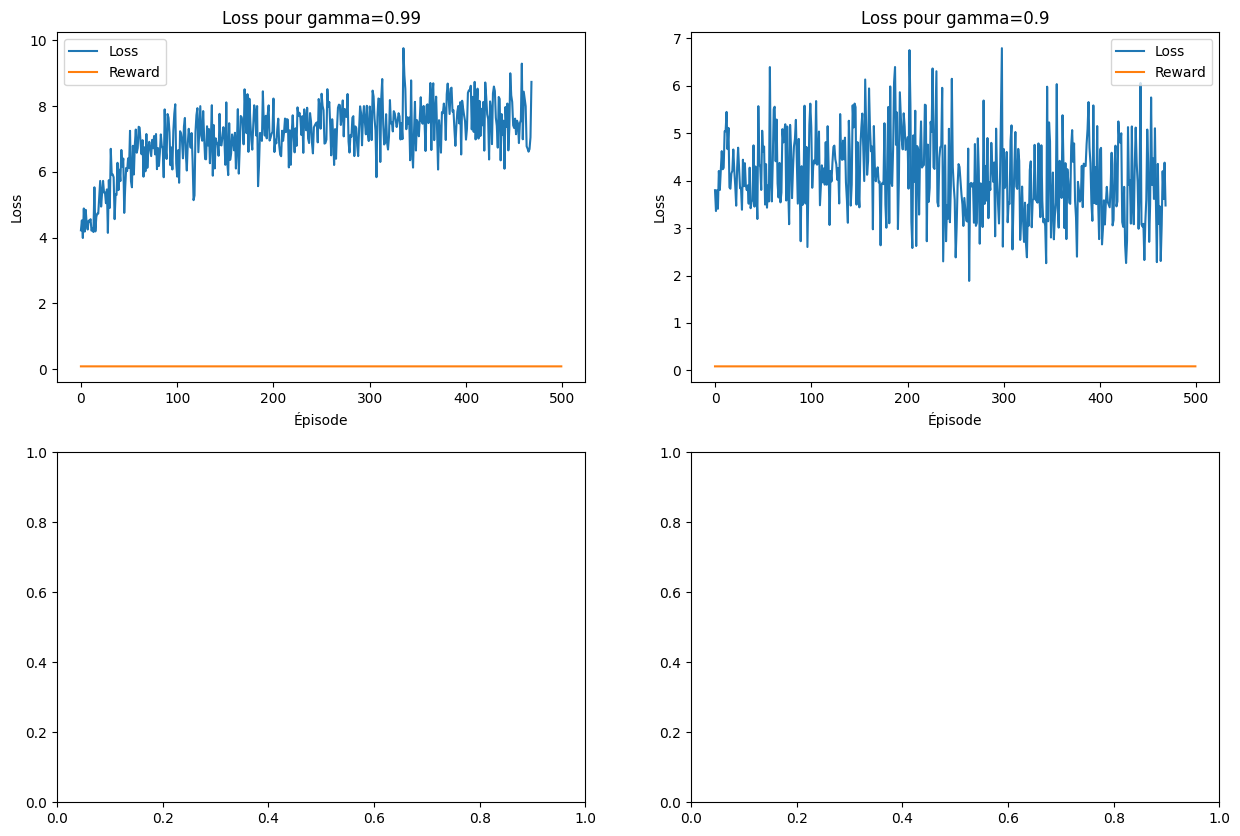

In [ ]:
state_size = 4
action_size = 8
# gammas = [0.99, 0.9, 0.5, 0.1]
gammas = [0.99, 0.5]
loss_f_gamma = []
rewards_f_gamma = []
episodes = 500

for gamma in gammas:
    ppo_net = ActorCritic(state_size, action_size)

    optimizer = Adam(ppo_net.parameters(), lr=0.001)
    buffer = ReplayBuffer(1000)

    # Reset environment and initialize observation
    obs = env.reset()
    state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))
    training_loss = []
    average_rewards = []

    for episode in range(episodes):
        action = select_action(q_net, state, eps=0.9)
        obs, reward, done, info = env.step(action)
        next_state = simple_encoder(event_from_obs_gym(obs, all_types, all_attributes))

        # Pénalisation supplémentaire pour l'agent qui ne fait rien
        # if action.all() == 0:
        #     reward -= 0.1
        # On s'assure qu'on commence par les cas simple, sans faux signaux i.e state = [1, 0, 0, 0]
        # if ((episode <= episodes /2 and state.sum() == 1 and state[0] == 1) or episode > episodes /2 ):
        #     buffer.push(state, action_encoder(action), reward, next_state, done)
        buffer.push(state, action_encoder(action), reward, next_state, done)
        state = next_state
        loss = train(q_net, target_q_net, buffer, optimizer, batch_size=32, gamma=gamma)
        if loss is not None:
            training_loss.append(loss)
        # update target network occasionnellement
        if episode % 50 == 0:
            target_q_net.load_state_dict(q_net.state_dict())
            test_env = gym.make(env_name)
            average_reward = evaluate_agent(test_env, q_net, episodes=200)
        average_rewards.append(average_reward)
        
    loss_f_gamma.append(training_loss)
    rewards_f_gamma.append(average_rewards)
    
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(len(gammas)):
    axs[i//2, i%2].plot(loss_f_gamma[i], label="Loss")
    axs[i//2, i%2].plot(rewards_f_gamma[i], label="Reward")
    axs[i//2, i%2].set_title(f"Loss pour gamma={0.99 if i==0 else 0.9 if i==1 else 0.5 if i==2 else 0.1}")
    axs[i//2, i%2].set_xlabel("Épisode")
    axs[i//2, i%2].set_ylabel("Loss")
    axs[i//2, i%2].legend()
fig.show()

In [ ]:
# Create the environment
env = gym.make(env_name)

# Store observed events
observed_events = []
actions = []
rewards = []

# Reset environment and initialize observation
obs = env.reset()
observed_events.append(simple_encoder(event_from_obs_gym(obs, all_types, all_attributes)))

# Run simulation loop to collect events
for step in range(10):
    action = env.action_space.sample()  # Fixed action (Can be randomized using env.action_space.sample())
    obs, reward, done, info = env.step(action)  # Take a step in the environment
    actions.append(action)
    rewards.append(reward)
    
    # Extract event information
    observed_events.append(simple_encoder(event_from_obs_gym(obs, all_types, all_attributes)))

    # print(f"Step {step+1} ({env_name}): Action={action}, Reward={reward}, Done={done}")

    if done:
        print(f"{env_name} reached a terminal state. Resetting...")
        obs = env.reset()

# Close the environment
env.close()

## 3. Combining the Two Environments

### **Objective**
The goal of this step is to **integrate robotic control** with the **Open the Chests** environment, creating a **dual-agent system** where one agent focuses on **event recognition**, and the other handles **robotic movement and task execution**.

### **Two-Agent System**
The system consists of **two specialized agents** that work together to achieve the objective:

#### **Agent 1: Event Recognition Agent**
- **Role:** Identifies when it is time to open a chest based on the observed event stream.
- **Task:** Recognizes **patterns in event sequences** and determines the correct **moment for action**.
- **Challenge:** Must handle **asynchronous event streams** and recognize **sequential dependencies**.

#### **Agent 2: Robotic Control Agent**
- **Role:** Controls the **robotic arm**, moving it to the correct chest and performing the action of opening it.
- **Task:** Receives signals from **Agent 1**, executes movement, and performs the physical **interaction with the chest**.
- **Challenge:** Accurately **execute motor control** and properly **coordinate** with **Agent 1**.

### **Goal**
The **dual-agent system** must function **cooperatively**, where:
- **Agent 1** handles **activity recognition** and determines when a chest should be opened.
- **Agent 2** receives the **signal from Agent 1**, moves the **robotic arm**, and executes the **chest-opening action**.

### **Suggested Approach**
To effectively **solve this problem**, the following **strategy** is recommended:

1. **Event Recognition (Agent 1)**
   - **Process the event stream** using a suitable pattern recognition method.
   - Possible techniques include:
     - **Temporal Windows** – Track events over a time window to detect relevant sequences.
     - **Transformers / LSTMs** – Use deep learning models to analyze complex event dependencies.
   - Once a **chest-opening pattern** is detected, **send a signal** to Agent 2.

2. **Robotic Control (Agent 2)**
   - **Receive the signal** from Agent 1.
   - Move the **robotic arm** to the identified chest.
   - Perform the **physical interaction**.
   - Confirm the **completion of the task** to the Open the Chests (OtC) environment.

3. **Cycle Reset & Continuation**
   - After the chest is opened:
     - **Agent 1 resumes event observation** to detect the next relevant sequence.
     - The **robot arm may reset** to an initial position before processing the next task.
   - The cycle repeats, allowing for **continuous operation**.
